In [26]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

In [27]:
import tensorflow as tf

In [28]:
tf.__version__

'2.3.0'

In [29]:
fashion_mnist=tf.keras.datasets.fashion_mnist

(ximg_train,yimg_train),(ximg_test,yimg_test)=fashion_mnist.load_data()

In [30]:
ximg_train=ximg_train/255.0
ximg_test=ximg_test/255.0
class_names=['T-shirt/top','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle boot']

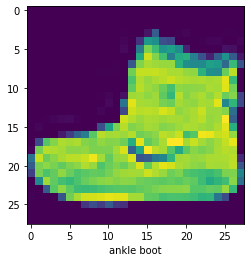

In [31]:
plt.imshow(ximg_train[0])
plt.xlabel(class_names[yimg_train[0]])
plt.show()

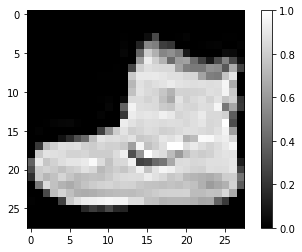

In [32]:
plt.imshow(ximg_train[0],cmap='gray')
plt.colorbar()
plt.show()

In [33]:
model=tf.keras.models.Sequential([tf.keras.layers.Flatten(  input_shape=(28,28) ),
                                 tf.keras.layers.Dense(512,activation=tf.nn.relu),
                                 tf.keras.layers.Dropout(0.2),
                                 tf.keras.layers.Dense(10,activation=tf.nn.sigmoid)])

In [34]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',metrics='acc')

In [35]:
history=model.fit(ximg_train,yimg_train,epochs=10,verbose=1, validation_split=0.2, shuffle=True)


Epoch 1/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.5405 - acc: 0.8081 - val_loss: 0.4180 - val_acc: 0.8489
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3988 - acc: 0.8550 - val_loss: 0.4191 - val_acc: 0.8533
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3622 - acc: 0.8660 - val_loss: 0.3683 - val_acc: 0.8666
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3390 - acc: 0.8759 - val_loss: 0.3474 - val_acc: 0.8737
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3240 - acc: 0.8792 - val_loss: 0.3263 - val_acc: 0.8828
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3093 - acc: 0.8854 - val_loss: 0.3662 - val_acc: 0.8630
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2980 - acc: 0.8890 - val_loss: 0.3256 - val_acc: 0.8844
Epoch 8/10
1500/1500 [==============================] - 6s 4ms

In [36]:
pred=model.predict(ximg_test)


In [37]:
model.evaluate(ximg_test,yimg_test)


313/313 [==============================] - 1s 2ms/step - loss: 0.3538 - acc: 0.8799


[0.3537791669368744, 0.8798999786376953]

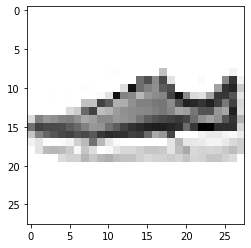

sneaker


In [38]:
plt.imshow(ximg_test[9],cmap=plt.cm.binary)#cmap means how the imgae to be presented
plt.show()
print(class_names[np.argmax(pred[9])]) #argmax gets the max value in the row

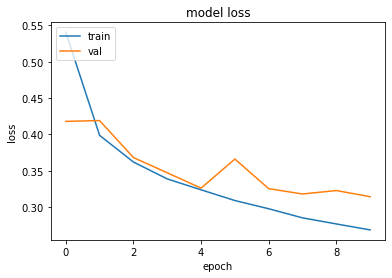

In [39]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()